### Natural Language Processing
- Tokenze text
- Remove stop words from text

In [ ]:
"""Import Statements:
"""

# Classics
import pandas as pd
import numpy as np 

#base
import re
from collections import Counter
import string


# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# NLP Libraries
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    

In [7]:
df = pd.read_csv('/Users/jorge/Med-Cabinet-2/Data/medcab.csv')
df = df.fillna('none')
df = df.drop('Unnamed: 0', 1)
df = df.replace([True, False],
                    [1.0, 0.0])
print(df.shape)
df.head(3)

(2350, 65)


,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,...,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,hybrid_type,sativa_type,indica_type
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Text Features: 

In [9]:
df['Savor'] = ', ' + df['Flavor'].astype(str)

In [10]:
df['Style'] = ', ' + df['Description'].astype(str)

In [11]:
df['Breed'] = ', ' + df['Strain'].astype(str)

In [12]:
df['Text'] = df['Effects'].map(str) + df['Savor']

In [13]:
df['Text'] = df['Text'].map(str) + df['Style']

In [14]:
df['Text'] = df['Text'].map(str) + df['Breed']

In [15]:
df['Text'] = df['Text'].map(str) + df['Style']

In [16]:
df['Effects_and_Flavor'] = df['Effects'].map(str) + df['Savor']

In [17]:
df.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,...,Uplifted_effect,None_effect,hybrid_type,sativa_type,indica_type,Savor,Style,Breed,Text,Effects_and_Flavor
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og","Creative, Energetic, Tingly, Euphoric, Relaxed...","Creative, Energetic, Tingly, Euphoric, Relaxed..."
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow","Relaxed, Aroused, Creative, Happy, Energetic, ...","Relaxed, Aroused, Creative, Happy, Energetic, ..."
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024","Uplifted, Happy, Relaxed, Energetic, Creative,...","Uplifted, Happy, Relaxed, Energetic, Creative,..."


In [18]:
df = df.reset_index()

In [19]:
df['ID'] = df['Strain'].index
df['ID'] = df['ID'].astype(int)

In [20]:
df['ID'].isna().sum()

0

In [21]:
np.random.seed(42)

In [22]:
df.shape

(2350, 72)

In [23]:
df['index'].nunique(), df['ID'].nunique()

(2350, 2350)

In [25]:
df['Text']= df['Text'].str.replace(',', ' ')

A function which takes a corpus of document and returns and dataframe of word counts for us to analyze.

In [34]:
# possible analysis functions

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [35]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [36]:
#Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [42]:
df['tokens'].head()

0    [Creative,  , Energetic,  , Tingly,  , Euphori...
1    [Relaxed,  , Aroused,  , Creative,  , Happy,  ...
2    [Uplifted,  , Happy,  , Relaxed,  , Energetic,...
3    [Tingly,  , Creative,  , Hungry,  , Relaxed,  ...
4    [Happy,  , Relaxed,  , Euphoric,  , Uplifted, ...
Name: tokens, dtype: object

In [37]:
# Using the "Count" function
wc = count(df['tokens'])

In [38]:
wc = count(df['tokens'])
wc.head(3)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
48,,2350,39608,1.0,0.097077,0.097077,1.000000
42,and,2231,14650,2.0,0.035906,0.132984,0.949362
66,a,2187,12238,3.0,0.029995,0.162978,0.930638


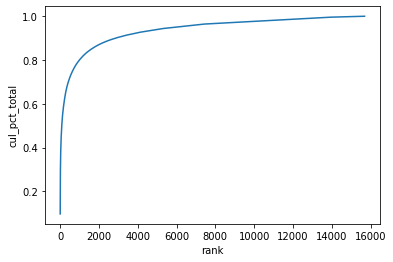

In [39]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [40]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.3472285878849523

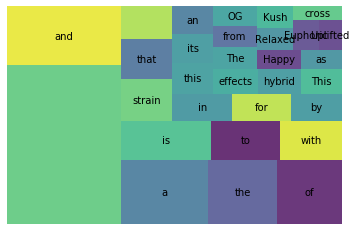

In [130]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [41]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 39608),
 ('and', 14650),
 ('a', 12238),
 ('the', 9642),
 ('of', 9130),
 ('is', 7700),
 ('to', 5902),
 ('with', 5336),
 ('strain', 4672),
 ('that', 4536)]

In [132]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [133]:
wc = count(df['tokens'])

In [134]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426


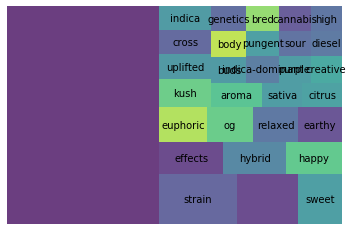

In [135]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [136]:
wc.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426
38,hybrid,1028,2362,6.0,0.008575,0.200986,0.437447
53,happy,1891,2118,7.0,0.007689,0.208675,0.804681
17,euphoric,1679,1998,8.0,0.007254,0.215929,0.714468
8,og,466,1944,9.0,0.007058,0.222987,0.198298
29,relaxed,1735,1859,10.0,0.006749,0.229736,0.738298


In [137]:
wc.tail(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14009,wild-thailand,1,1,14140.0,0.000004,0.999913,0.000426
14012,willie-nelson,1,1,14141.0,0.000004,0.999916,0.000426
14015,willy-wonka,1,1,14142.0,0.000004,0.999920,0.000426
14016,willys-wonder,1,1,14143.0,0.000004,0.999924,0.000426
14019,wonder-haze,1,1,14144.0,0.000004,0.999927,0.000426
14022,wonder-kid,1,1,14145.0,0.000004,0.999931,0.000426
14031,wonder-woman,1,1,14146.0,0.000004,0.999935,0.000426
14035,wonderwoman-og,1,1,14147.0,0.000004,0.999938,0.000426
14039,wonka-s-bubbilicious,1,1,14148.0,0.000004,0.999942,0.000426
14042,woody-kush,1,1,14149.0,0.000004,0.999946,0.000426


In [138]:
# Spacy's Default stop words:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [139]:
wc = count(df['tokens'])
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426
38,hybrid,1028,2362,6.0,0.008575,0.200986,0.437447
53,happy,1891,2118,7.0,0.007689,0.208675,0.804681
17,euphoric,1679,1998,8.0,0.007254,0.215929,0.714468
8,og,466,1944,9.0,0.007058,0.222987,0.198298
29,relaxed,1735,1859,10.0,0.006749,0.229736,0.738298


In [158]:
# Removing all words that may overlap with our flavor and effects columns:
STOP_WORDS = nlp.Defaults.stop_words.union(['strain',
                                            'effects',
                                            'effects,',
                                            'buds',
                                            'known',
                                            'genetics',
                                            'bred',
                                            '',
                                            ' ',
                                            'like',
                                            'notes',
                                            'flavors',
                                            'patients'
                                            ])

In [161]:
tokens = []

""" tokens w/o updated stopwords"""
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [164]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,,1153,3631,1.0,0.016300,0.016300,0.490638
43,sweet,1379,2650,2.0,0.011896,0.028196,0.586809
36,hybrid,1028,2362,3.0,0.010603,0.038799,0.437447
50,happy,1891,2118,4.0,0.009508,0.048307,0.804681
16,euphoric,1679,1998,5.0,0.008969,0.057276,0.714468


In [44]:
wc['appears_in_pct'].describe()

count    15691.000000
mean         0.004395
std          0.030518
min          0.000426
25%          0.000426
50%          0.000426
75%          0.001277
max          1.000000
Name: appears_in_pct, dtype: float64

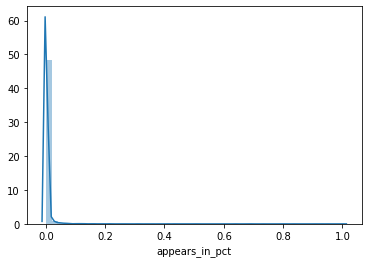

In [45]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

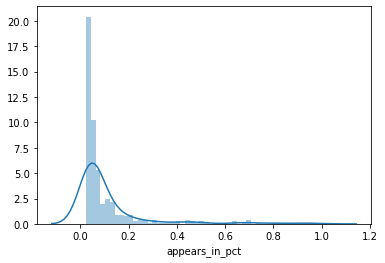

In [46]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [167]:
# new .csv file

df.to_csv(r'./data/medcab1_2.csv')